#### Задание 1
Вычислить вероятность выживания, если пассажиру:
- от 0 до 25 лет
- от 25 до 50 лет
- от 50 лет и старше

In [51]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Заполним сначала пропуски, разбив выборку на группы, где для каждой группы найдем медианное значение. Данным медианным значением заполним пропуски в соответствующей группе (слишком грубая оценка, если заполнять пропуски одной медианой всей выборки).

In [52]:
df_filled_age = df.copy()
df_filled_age['Age'] = df_filled_age['Age'].fillna(df_filled_age.groupby(['Sex', 'Pclass'])["Age"].transform('median'))
df_filled_age.info()
print('Максимальный возраст пассажиров:', max(df_filled_age['Age']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Максимальный возраст пассажиров: 80.0


In [60]:
# Указываем нужные нам интервалы
bins = [0, 25, 50, 81]
labels = ['0 - 25','25 - 50','>50']
# Разбиваем на интервалы
df_filled_age['intervals'] = pd.cut(df_filled_age['Age'], bins=bins, labels = labels, right = False)
print(df_filled_age.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
intervals      category
dtype: object


In [85]:
gr1 = df_filled_age[df_filled_age['intervals'] == '0 - 25'].shape[0]
gr2 = df_filled_age[df_filled_age['intervals'] == '25 - 50'].shape[0]
gr3 = df_filled_age[df_filled_age['intervals'] == '>50'].shape[0]
check_pass = gr1 + gr2 + gr3

live1 = df_filled_age[(df_filled_age['intervals'] == '0 - 25') & (df_filled_age['Survived'] == 1)].shape[0]
live2 = df_filled_age[(df_filled_age['intervals'] == '25 - 50') & (df_filled_age['Survived'] == 1)].shape[0]
live3 = df_filled_age[(df_filled_age['intervals'] == '>50') & (df_filled_age['Survived'] == 1)].shape[0]
live_all = df_filled_age[df_filled_age['Survived'] == 1].shape[0]

prob1 = live1 / gr1
prob2 = live2 / gr2
prob3 = live3 / gr3

print('Всего пассажиров до 25 лет         :', gr1)
print('Всего пассажиров от 25 до 50 лет   :', gr2)
print('Всего пассажиров старше 50 лет     :', gr3)
print()
print('Всего пассажиров                   :', check_pass)
print()
print('Всего выживших пассажиров в возрасте до 25 лет         :', live1)
print('Всего выживших пассажиров в возрасте от 25 до 50 лет   :', live2)
print('Всего выживших пассажиров в возрасте старше 50 лет     :', live3)
print()
print('Всего выживших пассажиров                              :', live_all)
print()
print('Вероятность выжить в возрасте до 25 лет                :', round(prob1,3))
print('Вероятность выжить в возрасте от 25 до 50 лет          :', round(prob2,3))
print('Вероятность выжить в возрасте старше 50 лет            :', round(prob3,3))


Всего пассажиров до 25 лет         : 320
Всего пассажиров от 25 до 50 лет   : 497
Всего пассажиров старше 50 лет     : 74

Всего пассажиров                   : 891

Всего выживших пассажиров в возрасте до 25 лет         : 143
Всего выживших пассажиров в возрасте от 25 до 50 лет   : 172
Всего выживших пассажиров в возрасте старше 50 лет     : 27

Всего выживших пассажиров                              : 342

Вероятность выжить в возрасте до 25 лет                : 0.447
Вероятность выжить в возрасте от 25 до 50 лет          : 0.346
Вероятность выжить в возрасте старше 50 лет            : 0.365


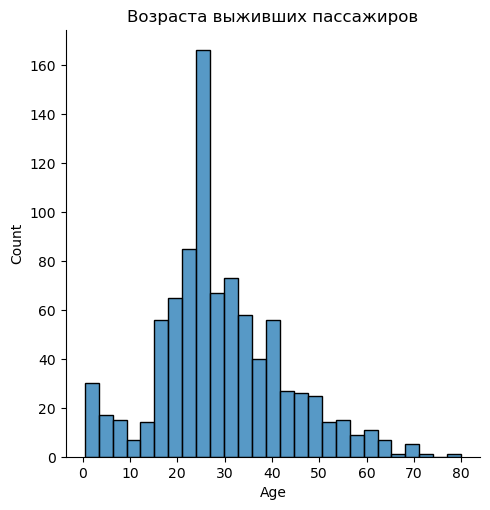

In [71]:
# Построим гистограмму всех выживших и оценим логичность полученных результатов
survived_plt = sns.displot(data = df_filled_age[df_filled_age['Survived'] == 1], x = df_filled_age['Age']);
survived_plt.set(title = 'Возраста выживших пассажиров');

Действительно видно, что площадь фигур 0 - 25 и 25 - 50 почти одинакова, в то время как выжившие пассажиры старше 50 лет составляют совсем малую долю

#### Задание 2
Вычислить с какой вероятностью пассажир женского пола, если известно, что он выжил (использовать теорему Байеса)

In [87]:
# Создадим дополнительные столбцы для расчетов и фильтров
import numpy as np
df['Female'] = np.where(df['Sex'] == 'female', 1, 0)
df['Male'] = np.where(df['Sex'] == 'male', 1, 0)
df['Survived_women'] = np.where((df['Sex'] == 'female') & (df['Survived'] == 1), 1, 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male,Survived_women
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0


In [88]:
total_women = df['Female'].sum()
total_men = df['Male'].sum()
check = total_women + total_men
women_survived = df['Survived_women'].sum() 
total_survived = df['Survived'].sum()

print('Всего женщин на борту           : ', total_women)
print('Всего мужчин на борту           : ', total_men)
print('Всего людей на борту            : ', check)
print('Всего выживших людей на борту   : ', total_survived)
print('Всего выживших женщин на борту  : ', women_survived)


Всего женщин на борту           :  314
Всего мужчин на борту           :  577
Всего людей на борту            :  891
Всего выживших людей на борту   :  342
Всего выживших женщин на борту  :  233


In [93]:
# Рассчитываем вероятность women, survived_women, survived
p_women = round(total_women / check, 3)
p_survived = round(total_survived / check, 3)
p_SW = round(women_survived / total_women, 3)

P = p_women * p_SW / p_survived

print ('Вероятность того, что пассажир женского пола  : ', p_women)
print ('Вероятность того, что пассажир выживет        : ', p_survived)
print('Вероятность того, женщина выживет              :',  p_SW)

print('Ответ к задаче: вероятность того, что выживший пассажир женского пола: ', round(P,4) )

Вероятность того, что пассажир женского пола  :  0.352
Вероятность того, что пассажир выживет        :  0.384
Вероятность того, женщина выживет              : 0.742
Ответ к задаче: вероятность того, что выживший пассажир женского пола:  0.6802


#### Задание 3

Закон распределения задается функцией плотности

$ f(x) = \lambda e^{-\lambda x}, x > 0 $

$ f(x) = 0, x <= 0 $

Найти вероятность того, что событие произойдет при x∈[1,2]

#### Решение
Т.к. функция непрерывная, то вероятность попадания в интервал x∈[1,2] найдем с помощью двойного интеграла, но для начала необходимо определить, для каких значений параметра $\lambda$ имеет смысл производить интегрирование. Для этого проверим, для каких $\lambda$ будут выполнятся свойства вероятности: 

1. Ненегативность - для всех значений x функция плотности вероятности должна быть >=  0
2. Нормировка - интеграл вероятностей по всему пространству измеререний = 1

Ненегативность:    
Данное свойство выполняется при x > 0 (по области определения функции)

Нормировка:  
$\int^{+\infty}_{-\infty}{f(x)}{\rm d}x = \int^{0}_{-\infty}{f(x)}{\rm d}x + \int^{+\infty}_{0}{f(x)}{\rm d}x$  
При значении аргумента x < 0 значение функции равно 0, т.е.:
$\int^{+\infty}_{-\infty}{f(x)}{\rm d}x = 0 + \int^{+\infty}_{0}{\lambda e^{-\lambda x}}{\rm d}x = \int^{+\infty}_{0}{\lambda e^{-\lambda x}}{\rm d}x$  

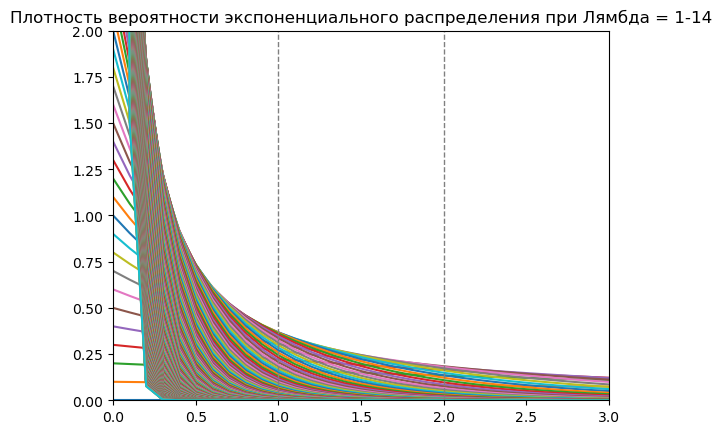

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Диапазон входных значений
x_arr = np.arange(0, 5, 0.1)
# Диапазон лямбда
lambdas = np.arange(-5, 30, 0.1)
#Задаем функцию
def exponential_pdf(x, lambda_param):
    return lambda_param * np.exp(-lambda_param * x)

#Отрисовываем функцию
for lambd in lambdas:
    y = exponential_pdf(x_arr, lambd)
    plt.plot(x_arr, y, label = r'$\lambda$' + '=' + str(lambd)) ;

plt.axvline(x=1, color = 'gray', linestyle='--', linewidth=1) ;
plt.axvline(x=2, color = 'gray', linestyle='--', linewidth=1) ;
plt.title('Плотность вероятности экспоненциального распределения при Лямбда = 1-14') ;
plt.xlim(0, 3) ;
plt.ylim(0, 2) ;

In [11]:
# Проверка свойств
def check_probability_properties(lambdas):
    results = {}
    for lam in lambdas:
        if lam > 0:
            # Ненегативность
            non_negativity = True     # По определению функции
            # Нормировка
            integral_value, _ = quad(exponential_pdf, 0, np.inf, args=(lam,))
            results[lam] = non_negativity and np.isclose(integral_value, 1)  
        else:
            results[lam] = False
    return results

properties = check_probability_properties(lambdas)

for i in properties:
    print(f'Для лямбда = {round(i,2)}: {properties[i]}')

Для лямбда = -5.0: False
Для лямбда = -4.9: False
Для лямбда = -4.8: False
Для лямбда = -4.7: False
Для лямбда = -4.6: False
Для лямбда = -4.5: False
Для лямбда = -4.4: False
Для лямбда = -4.3: False
Для лямбда = -4.2: False
Для лямбда = -4.1: False
Для лямбда = -4.0: False
Для лямбда = -3.9: False
Для лямбда = -3.8: False
Для лямбда = -3.7: False
Для лямбда = -3.6: False
Для лямбда = -3.5: False
Для лямбда = -3.4: False
Для лямбда = -3.3: False
Для лямбда = -3.2: False
Для лямбда = -3.1: False
Для лямбда = -3.0: False
Для лямбда = -2.9: False
Для лямбда = -2.8: False
Для лямбда = -2.7: False
Для лямбда = -2.6: False
Для лямбда = -2.5: False
Для лямбда = -2.4: False
Для лямбда = -2.3: False
Для лямбда = -2.2: False
Для лямбда = -2.1: False
Для лямбда = -2.0: False
Для лямбда = -1.9: False
Для лямбда = -1.8: False
Для лямбда = -1.7: False
Для лямбда = -1.6: False
Для лямбда = -1.5: False
Для лямбда = -1.4: False
Для лямбда = -1.3: False
Для лямбда = -1.2: False
Для лямбда = -1.1: False


Видно, что свойства вероятности выполняются для значений лямбда > 0    
Находим вероятность для положительных лямбда значений

In [12]:
result = integrate.dblquad(exponential_pdf, 1,2, 0, np.inf)
print(result)

(0.9999999999999883, 1.4111506039580601e-08)


Полученная вероятность очень близка к 1, что логично, потому что график функции плотности вероятности экспоненциального распределения при любых $\lambda$ > 0 будет попадать в интервал x = [1; 2]